# SpaceX Falcon 9 first stage Landing Prediction

## 1. Project Overview

## 2. Data Collection

### 2.1 SpaceX API (up to 2022)

In [15]:
# Required libraries
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [68]:
# Data Collection from API
spacex_url="https://api.spacexdata.com/v4/launches/"
response = requests.get(spacex_url)
data = response.json()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

data = pd.DataFrame(data)

In [69]:
data.head()

,fairings,links,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id
0,"{'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}","{'patch': {'small': 'https://images2.imgbox.com/94/f2/NN6Ph45r_o.png', 'large': 'https://images2.imgbox.com/5b/02/QcxHUb5V_o.png'}, 'reddit': {'campaign': None, 'launch': None, 'media': None, 'recovery': None}, 'flickr': {'small': [], 'original': []}, 'presskit': None, 'webcast': 'https://www.youtube.com/watch?v=0a_00nJ_Y88', 'youtube_id': '0a_00nJ_Y88', 'article': 'https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html', 'wikipedia': 'https://en.wikipedia.org/wiki/DemoSat'}",2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cd9ffd86e000604b32a
1,"{'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}","{'patch': {'small': 'https://images2.imgbox.com/f9/4a/ZboXReNb_o.png', 'large': 'https://images2.imgbox.com/80/a2/bkWotCIS_o.png'}, 'reddit': {'campaign': None, 'launch': None, 'media': None, 'recovery': None}, 'flickr': {'small': [], 'original': []}, 'presskit': None, 'webcast': 'https://www.youtube.com/watch?v=Lk4zQ2wP-Nc', 'youtube_id': 'Lk4zQ2wP-Nc', 'article': 'https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html', 'wikipedia': 'https://en.wikipedia.org/wiki/DemoSat'}",None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]","Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdaffd86e000604b32b
2,"{'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}","{'patch': {'small': 'https://images2.imgbox.com/6c/cb/na1tzhHs_o.png', 'large': 'https://images2.imgbox.com/4a/80/k1oAkY0k_o.png'}, 'reddit': {'campaign': None, 'launch': None, 'media': None, 'recovery': None}, 'flickr': {'small': [], 'original': []}, 'presskit': None, 'webcast': 'https://www.youtube.com/watch?v=v0w9p3U8860', 'youtube_id': 'v0w9p3U8860', 'article': 'http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary', 'wikipedia': 'https://en.wikipedia.org/wiki/Trailblazer_(satellite)'}",None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdbffd86e000604b32c
3,"{'reused': False, 'recovery_a

In [70]:
data.shape

(205, 27)

In [71]:
data.columns

Index(['fairings', 'links', 'static_fire_date_utc', 'static_fire_date_unix',
       'net', 'window', 'rocket', 'success', 'failures', 'details', 'crew',
       'ships', 'capsules', 'payloads', 'launchpad', 'flight_number', 'name',
       'date_utc', 'date_unix', 'date_local', 'date_precision', 'upcoming',
       'cores', 'auto_update', 'tbd', 'launch_library_id', 'id'],
      dtype='object')

In [72]:
# Important functions to extract features from the data
def get_BoosterVersion(data):
    for x in data['rocket']:
        if x:
            response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
            BoosterVersion.append(response['name'])

def get_LaunchSite(data):
    for x in data['launchpad']:
        if x:
            response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
            Longitude.append(response['longitude'])
            Latitude.append(response['latitude'])
            LaunchSite.append(response['name'])

def get_Payloads(data):
    for x in data['payloads']:
        if x:
            response = requests.get("https://api.spacexdata.com/v4/payloads/"+x).json()
            Payload_Kg.append(response['mass_kg'])
            Orbit.append(response['orbit'])

def get_Core(data):
    for x in data['cores']:
        if x['core']!= None:
            response = requests.get("https://api.spacexdata.com/v4/cores/"+x['core']).json()
            Block.append(response['block'])
            Serial.append(response['serial'])
            
        else:
            Block.append(None)
            Serial.append(None)
        Gridfins.append(x['gridfins'])
        Legs.append(x['legs'])
        Reused.append(x['reused'])
        LandingAttempt.append(x['landing_attempt'])
        LandingType.append(x['landing_type'])
        SuccessLanding.append(str(x['landing_success']))
        Landpad.append(x['landpad'])

# Features's lists that are going to be the columns of our dataframe
BoosterVersion = []
Block = []
Longitude =[]
Latitude = []
LaunchSite = []
Payload_Kg = []
Orbit = []
Serial = []
SuccessLanding = []
Landpad = []
Gridfins = []
Legs = []
Reused = []
LandingAttempt = []
LandingType = []

In [73]:
# We keep the rockets that have single boosters
df = data[data['cores'].map(len)==1].copy()
df = data[data['payloads'].map(len)==1].copy()

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
df['cores'] = df['cores'].map(lambda x: x[0])
df['payloads'] = df['payloads'].map(lambda x: x[0])

df['Date'] = pd.to_datetime(df['date_utc']).dt.date
df.head()

,fairings,links,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id,Date
0,"{'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}","{'patch': {'small': 'https://images2.imgbox.com/94/f2/NN6Ph45r_o.png', 'large': 'https://images2.imgbox.com/5b/02/QcxHUb5V_o.png'}, 'reddit': {'campaign': None, 'launch': None, 'media': None, 'recovery': None}, 'flickr': {'small': [], 'original': []}, 'presskit': None, 'webcast': 'https://www.youtube.com/watch?v=0a_00nJ_Y88', 'youtube_id': '0a_00nJ_Y88', 'article': 'https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html', 'wikipedia': 'https://en.wikipedia.org/wiki/DemoSat'}",2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",Engine failure at 33 seconds and loss of vehicle,[],[],[],5eb0e4b5b6c3bb0006eeb1e1,5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",True,False,None,5eb87cd9ffd86e000604b32a,2006-03-24
1,"{'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}","{'patch': {'small': 'https://images2.imgbox.com/f9/4a/ZboXReNb_o.png', 'large': 'https://images2.imgbox.com/80/a2/bkWotCIS_o.png'}, 'reddit': {'campaign': None, 'launch': None, 'media': None, 'recovery': None}, 'flickr': {'small': [], 'original': []}, 'presskit': None, 'webcast': 'https://www.youtube.com/watch?v=Lk4zQ2wP-Nc', 'youtube_id': 'Lk4zQ2wP-Nc', 'article': 'https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html', 'wikipedia': 'https://en.wikipedia.org/wiki/DemoSat'}",None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]","Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],5eb0e4b6b6c3bb0006eeb1e2,5e9e4502f5090995de566f86,2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",True,False,None,5eb87cdaffd86e000604b32b,2007-03-21
3,"{'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}","{'patch': {'small': 'https://images2.imgbox.com/95/39/sRqN7rsv_o.png', 'large': 'https://images2.imgbox.com/a3/99/qswRYzE8_o.png'}, 'reddit': {'campaign': None, 'launch': None, 'media': None, 'recovery': None}, 'flickr': {'small': [], 'original': []}, 'presskit': None, 'webcast': 'https://www.youtube.com/watch?v=dLQ2tZEH6G0', 'youtube_id': 'dLQ2tZEH6G0', 'article': 'https://en.wikipedia.org/wiki/Ratsat', 'wikipedia': 'https://en.wikipedia.org/wiki/Ratsat'}",2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],5eb0e4b7b6c3bb0006eeb1e5,5e9e4502f5090995de566f86,4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",True,False,None,5eb87cdbffd86e000604b32d,2008-09-28
4,"{'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}","{

In [74]:
# Implement of the functions to the dataframe df
get_BoosterVersion(df)
get_Core(df)
get_LaunchSite(df)
get_Payloads(df)

In [75]:
# A dictionory that corresponds the values of its feature with a proper name
data_dict = {
    "Date" : list(df['Date']),
    "Booster Version" : BoosterVersion,
    "Block" : Block,
    "Serial" : Serial,
    "Gridfins": Gridfins,
    "Legs": Legs,
    "Reused": Reused,
    "Longitude" : Longitude,
    "Latitude" : Latitude,
    "Launch Site" : LaunchSite,
    "Payload (Kg)" : Payload_Kg,
    "Orbit" : Orbit,
    "Landpad" : Landpad,
    "Landing Type": LandingType,
    "Landing Attempt": LandingAttempt,
    "Landing Success": SuccessLanding
}

In [22]:
# Convert the dictionary to a dataframe
spacex_api_22 = pd.DataFrame(data_dict)

In [23]:
spacex_api_22.head()

,Date,Booster Version,Block,Serial,Gridfins,Legs,Reused,Longitude,Latitude,Launch Site,Payload (Kg),Orbit,Landpad,Landing Type,Landing Attempt,Landing Success
0,2006-03-24,Falcon 1,NaN,Merlin1A,False,False,False,167.743129,9.047721,Kwajalein Atoll,20.0,LEO,None,None,False,None
1,2007-03-21,Falcon 1,NaN,Merlin2A,False,False,False,167.743129,9.047721,Kwajalein Atoll,NaN,LEO,None,None,False,None
2,2008-09-28,Falcon 1,NaN,Merlin2C,False,False,False,167.743129,9.047721,Kwajalein Atoll,165.0,LEO,None,None,False,None
3,2009-07-13,Falcon 1,NaN,Merlin3C,False,False,False,167.743129,9.047721,Kwajalein Atoll,200.0,LEO,None,None,False,None
4,2010-06-04,Falcon 9,1.0,B0003,False,False,False,-80.577366,28.561857,CCSFS SLC 40,NaN,LEO,None,None,False,None


In [24]:
spacex_api_22.tail()

,Date,Booster Version,Block,Serial,Gridfins,Legs,Reused,Longitude,Latitude,Launch Site,Payload (Kg),Orbit,Landpad,Landing Type,Landing Attempt,Landing Success
175,2022-10-20,Falcon 9,NaN,None,None,None,None,-80.577366,28.561857,CCSFS SLC 40,13260.0,VLEO,None,None,None,None
176,2022-11-01,Falcon 9,NaN,None,None,None,None,-80.577366,28.561857,CCSFS SLC 40,5100.0,MEO,None,None,None,None
177,2022-12-01,Falcon 9,NaN,None,None,None,None,-120.610829,34.632093,VAFB SLC 4E,NaN,PO,None,None,None,None
178,2022-12-01,Falcon 9,NaN,None,None,None,None,-80.577366,28.561857,CCSFS SLC 40,NaN,SSO,None,None,None,None
179,2022-12-01,Falcon 9,NaN,None,None,None,None,-80.577366,28.561857,CCSFS SLC 40,5100.0,MEO,None,None,None,None


### 2.2 Data Collection From Wikipedia

SpaceX's API is giving us some useful data, however the data is not updated. So, we will use a second way to collect data from 2022 until 2025. We are going to collect it from Wikipedia.

In [14]:
# Extract wikipedia's data and load to a dataframe
wiki_url = "https://en.wikipedia.org/wiki/List_of_Falcon_9_and_Falcon_Heavy_launches#Past_launches"
tables = pd.read_html(wiki_url)
t2023 = tables[0]
t2023.head()

,Flight No.,Date and time (UTC),"Version, booster[f]",Launch site,Payload[g],Payload mass,Orbit,Customer,Launch outcome,Booster landing
0,195,"January 3, 2023 14:56[17]",F9 B5 B1060.15,"Cape Canaveral, SLC‑40",Transporter-6 (115 payload smallsat rideshare),Unknown[h],SSO,Various,Success,Success (LZ‑1)
1,195,Dedicated SmallSat Rideshare mission to Sun-sy...,Dedicated SmallSat Rideshare mission to Sun-sy...,Dedicated SmallSat Rideshare mission to Sun-sy...,Dedicated SmallSat Rideshare mission to Sun-sy...,Dedicated SmallSat Rideshare mission to Sun-sy...,Dedicated SmallSat Rideshare mission to Sun-sy...,Dedicated SmallSat Rideshare mission to Sun-sy...,Dedicated SmallSat Rideshare mission to Sun-sy...,Dedicated SmallSat Rideshare mission to Sun-sy...
2,196,"January 10, 2023 04:50[23]",F9 B5 B1076.2,"Cape Canaveral, SLC‑40",OneWeb 16 (40 satellites),"6,000 kg (13,000 lb)",Polar LEO,OneWeb,Success,Success (LZ‑1)
3,196,"Following the Russian invasion of Ukraine, One...","Following the Russian invasion of Ukraine, One...","Following the Russian invasion of Ukraine, One...","Following the Russian invasion of Ukraine, One...","Following the Russian invasion of Ukraine, One...","Following the Russian invasion of Ukraine, One...","Following the Russian invasion of Ukraine, One...","Following the Russian invasion of Ukraine, One...","Following the Russian invasion of Ukraine, One..."
4,FH 5,"January 15, 2023 22:56[29]",Falcon Heavy B5 B1070 (core),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,No attempt


In [15]:
t2023.columns

Index(['Flight No.', 'Date and time (UTC)', 'Version, booster[f]',
       'Launch site', 'Payload[g]', 'Payload mass', 'Orbit', 'Customer',
       'Launch outcome', 'Booster landing'],
      dtype='object')

In [173]:
# We keep the rows that start with Month's name
mask = t2023['Date and time (UTC)'].astype(str).str.match(r'^[A-Za-z]+\s+\d{1,2}')

t2023 = t2023[mask].copy()
t2023.head()

,Flight No.,Date and time (UTC),"Version, booster[f]",Launch site,Payload[g],Payload mass,Orbit,Customer,Launch outcome,Booster landing
0,195,"January 3, 2023 14:56[17]",F9 B5 B1060.15,"Cape Canaveral, SLC‑40",Transporter-6 (115 payload smallsat rideshare),Unknown[h],SSO,Various,Success,Success (LZ‑1)
2,196,"January 10, 2023 04:50[23]",F9 B5 B1076.2,"Cape Canaveral, SLC‑40",OneWeb 16 (40 satellites),"6,000 kg (13,000 lb)",Polar LEO,OneWeb,Success,Success (LZ‑1)
4,FH 5,"January 15, 2023 22:56[29]",Falcon Heavy B5 B1070 (core),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,No attempt
5,FH 5,"January 15, 2023 22:56[29]",B1064.2 (side),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,Success (LZ‑2)
6,FH 5,"January 15, 2023 22:56[29]",B1065.2 (side),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,Success (LZ‑1)


In [17]:
# Function to get the tables with the annual data
tables23_24_25 = []

def get_tables(df):
    for table in df[0:3]:

        # We keep the rows that start with Month's name
        date_col = table.columns[1]
        mask = table[date_col].astype(str).str.match(r'^[A-Za-z]+\s+\d{1,2}')
        
        table = table[mask].copy()
        tables23_24_25.append(table)

In [18]:
# Implement of the function
get_tables(tables)

In [19]:
tables23_24_25[1].head()

,Flight No.,Date and time (UTC),"Version, booster[f]",Launch site,Payload[g],Payload mass,Orbit,Customer,Launch outcome,Booster landing
0,286,"January 3, 2024 03:44[229]",F9 B5 B1082.1,"Vandenberg, SLC‑4E",Starlink: Group 7-9 (22 satellites),"~16,800 kg (37,000 lb)",LEO,SpaceX,Success,Success (OCISLY)
2,287,"January 3, 2024 23:04[230]",F9 B5 B1076.10,"Cape Canaveral, SLC‑40",Ovzon-3,"1,800 kg (4,000 lb)",GTO,Ovzon,Success,Success (LZ‑1)
4,288,"January 7, 2024 22:35[234]",F9 B5 B1067.16,"Cape Canaveral, SLC‑40",Starlink: Group 6-35 (23 satellites),"~17,100 kg (37,700 lb)",LEO,SpaceX,Success,Success (ASOG)
6,289,"January 14, 2024 08:59[236]",F9 B5 B1061.18,"Vandenberg, SLC‑4E",Starlink: Group 7-10 (22 satellites),"~16,700 kg (36,800 lb)",LEO,SpaceX,Success,Success (OCISLY)
8,290,"January 15, 2024 01:52[237]",F9 B5 B1073.12,"Cape Canaveral, SLC‑40",Starlink: Group 6-37 (23 satellites),"~17,100 kg (37,700 lb)",LEO,SpaceX,Success,Success (ASOG)


In [21]:
# Merge the tables for the years 2023, 2024, 2025
spacex_wiki_23_25 = pd.concat(t232425, ignore_index=True)
spacex_wiki_23_25

,Flight No.,Date and time (UTC),"Version, booster[f]",Launch site,Payload[g],Payload mass,Orbit,Customer,Launch outcome,Booster landing
0,195,"January 3, 2023 14:56[17]",F9 B5 B1060.15,"Cape Canaveral, SLC‑40",Transporter-6 (115 payload smallsat rideshare),Unknown[h],SSO,Various,Success,Success (LZ‑1)
1,196,"January 10, 2023 04:50[23]",F9 B5 B1076.2,"Cape Canaveral, SLC‑40",OneWeb 16 (40 satellites),"6,000 kg (13,000 lb)",Polar LEO,OneWeb,Success,Success (LZ‑1)
2,FH 5,"January 15, 2023 22:56[29]",Falcon Heavy B5 B1070 (core),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,No attempt
3,FH 5,"January 15, 2023 22:56[29]",B1064.2 (side),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,Success (LZ‑2)
4,FH 5,"January 15, 2023 22:56[29]",B1065.2 (side),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,Success (LZ‑1)
...,...,...,...,...,...,...,...,...,...,...
279,451,"March 24, 2025 17:48[511]",F9 B5 B1092.2,"Cape Canaveral, SLC‑40",NROL-69,Unknown,LEO,USSF,Success,Success (LZ‑1)
280,452,"March 26, 2025 22:11[514]",F9 B5 B1063.24,"Vandenberg, SLC‑4E",Starlink: Group 11-7,"~15,500 kg (34,200 lb)",LEO,SpaceX,Success,Success (OCISLY)
281,453,"March 31, 2025 19:52[515]",F9 B5 B1080.17,"Cape Canaveral, SLC‑40",Starlink: Group 6-80,"~16,100 kg (35,500 lb)",LEO,SpaceX,Success,Success (JRTI)
282,454,"April 1, 2025 01:46[516]",F9 B5 B1085.6,"Kennedy, LC‑39A",Fram2 (Crew Dragon C207.4 Resilience),"~13,000 kg (29,000 lb)",Polar (Retrograde),Chun Wang,Success,Success (ASOG)


## 3. Data Preprocessing

### 3.1 Data untill 2022

In [32]:
# We keep only launches that attempted to land
spacex_api_22 = spacex_api_22[(spacex_api_22['Landing Attempt'] == True) & (spacex_api_22['Landing Type'] != 'Ocean')]

In [33]:
# We keep only Falcon9 launches as SpaceX ended the Falcon 1 program
spacex_api_22 = spacex_api_22[spacex_api_22['Booster Version'] == 'Falcon 9']
spacex_api_22.head()

,Date,Booster Version,Block,Serial,Gridfins,Legs,Reused,Longitude,Latitude,Launch Site,Payload (Kg),Orbit,Landpad,Landing Type,Landing Attempt,Landing Success
15,2015-01-10,Falcon 9,1.0,B1012,True,True,False,-80.577366,28.561857,CCSFS SLC 40,2395.0,ISS,5e9e3032383ecb761634e7cb,ASDS,True,False
17,2015-04-14,Falcon 9,1.0,B1015,True,True,False,-80.577366,28.561857,CCSFS SLC 40,1898.0,ISS,5e9e3032383ecb761634e7cb,ASDS,True,False
19,2015-06-28,Falcon 9,1.0,B1018,True,True,False,-80.577366,28.561857,CCSFS SLC 40,2477.0,ISS,5e9e3032383ecb6bb234e7ca,ASDS,True,None
20,2015-12-22,Falcon 9,1.0,B1019,True,True,False,-80.577366,28.561857,CCSFS SLC 40,2034.0,LEO,5e9e3032383ecb267a34e7c7,RTLS,True,True
21,2016-01-17,Falcon 9,1.0,B1017,True,True,False,-120.610829,34.632093,VAFB SLC 4E,553.0,PO,5e9e3033383ecbb9e534e7cc,ASDS,True,False


In [34]:
spacex_api_22.columns

Index(['Date', 'Booster Version', 'Block', 'Serial', 'Gridfins', 'Legs',
       'Reused', 'Longitude', 'Latitude', 'Launch Site', 'Payload (Kg)',
       'Orbit', 'Landpad', 'Landing Type', 'Landing Attempt',
       'Landing Success'],
      dtype='object')

In [37]:
# We keep the Features that are important in the prediction
spacex22 = spacex_api_22[[
    'Date',
    'Block', 
    'Serial', 
    'Gridfins', 
    'Legs',
    'Reused',
    'Launch Site', 
    'Payload (Kg)',
    'Orbit',
    'Landing Type', 
    'Landing Success'
]]

In [38]:
spacex22.reset_index(drop=True, inplace=True)
spacex22.head()

,Date,Block,Serial,Gridfins,Legs,Reused,Launch Site,Payload (Kg),Orbit,Landing Type,Landing Success
0,2015-01-10,1.0,B1012,True,True,False,CCSFS SLC 40,2395.0,ISS,ASDS,False
1,2015-04-14,1.0,B1015,True,True,False,CCSFS SLC 40,1898.0,ISS,ASDS,False
2,2015-06-28,1.0,B1018,True,True,False,CCSFS SLC 40,2477.0,ISS,ASDS,None
3,2015-12-22,1.0,B1019,True,True,False,CCSFS SLC 40,2034.0,LEO,RTLS,True
4,2016-01-17,1.0,B1017,True,True,False,VAFB SLC 4E,553.0,PO,ASDS,False


In [39]:
spacex22['Gridfins'].unique()

array([True], dtype=object)

In [40]:
spacex22['Legs'].unique()

array([True], dtype=object)

In [41]:
# As every booster has these two features in common, there's no reason to keep them
spacex22 = spacex22.drop(['Gridfins', 'Legs'], axis=1)

In [42]:
spacex22.shape

(142, 9)

In [43]:
spacex22['Date'] = pd.to_datetime(spacex22['Date'])

In [44]:
spacex22.dtypes

Date               datetime64[ns]
Block                     float64
Serial                     object
Reused                     object
Launch Site                object
Payload (Kg)              float64
Orbit                      object
Landing Type               object
Landing Success            object
dtype: object

### 3.2 Data 2023-2025

In [47]:
spacex_wiki_23_25.head()

,Flight No.,Date and time (UTC),"Version, booster[f]",Launch site,Payload[g],Payload mass,Orbit,Customer,Launch outcome,Booster landing
0,195,"January 3, 2023 14:56[17]",F9 B5 B1060.15,"Cape Canaveral, SLC‑40",Transporter-6 (115 payload smallsat rideshare),Unknown[h],SSO,Various,Success,Success (LZ‑1)
1,196,"January 10, 2023 04:50[23]",F9 B5 B1076.2,"Cape Canaveral, SLC‑40",OneWeb 16 (40 satellites),"6,000 kg (13,000 lb)",Polar LEO,OneWeb,Success,Success (LZ‑1)
2,FH 5,"January 15, 2023 22:56[29]",Falcon Heavy B5 B1070 (core),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,No attempt
3,FH 5,"January 15, 2023 22:56[29]",B1064.2 (side),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,Success (LZ‑2)
4,FH 5,"January 15, 2023 22:56[29]",B1065.2 (side),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,Success (LZ‑1)


In [48]:
# We keep launches with only one core
spacex_wiki_23_25['Flight No.'] = spacex_wiki_23_25['Flight No.'].astype(str)
spacex_wiki_23_25 = spacex_wiki_23_25[~spacex_wiki_23_25['Flight No.'].str.startswith('FH')]
spacex_wiki_23_25.head()

,Flight No.,Date and time (UTC),"Version, booster[f]",Launch site,Payload[g],Payload mass,Orbit,Customer,Launch outcome,Booster landing
0,195,"January 3, 2023 14:56[17]",F9 B5 B1060.15,"Cape Canaveral, SLC‑40",Transporter-6 (115 payload smallsat rideshare),Unknown[h],SSO,Various,Success,Success (LZ‑1)
1,196,"January 10, 2023 04:50[23]",F9 B5 B1076.2,"Cape Canaveral, SLC‑40",OneWeb 16 (40 satellites),"6,000 kg (13,000 lb)",Polar LEO,OneWeb,Success,Success (LZ‑1)
5,197,"January 18, 2023 12:24[33]",F9 B5 B1077.2,"Cape Canaveral, SLC‑40",USA-343 (GPS-III SV06),"4,352 kg (9,595 lb)",MEO,USSF,Success,Success (JRTI)
6,198,"January 19, 2023 15:43[39]",F9 B5 B1075.1,"Vandenberg, SLC‑4E",Starlink: Group 2-4 (51 satellites),"15,000 kg (33,000 lb)",LEO,SpaceX,Success,Success (OCISLY)
7,199,"January 26, 2023 09:32[40]",F9 B5 B1067.9,"Cape Canaveral, SLC‑40",Starlink: Group 5-2 (56 satellites),"~17,400 kg (38,400 lb)",LEO,SpaceX,Success,Success (JRTI)


In [49]:
spacex_wiki_23_25.columns

Index(['Flight No.', 'Date and time (UTC)', 'Version, booster[f]',
       'Launch site', 'Payload[g]', 'Payload mass', 'Orbit', 'Customer',
       'Launch outcome', 'Booster landing'],
      dtype='object')

In [140]:
# We keep the Features that are important in the prediction
spacex23_25 = spacex_wiki_23_25[[
    'Date and time (UTC)', 
    'Version, booster[f]',
    'Launch site', 
    'Payload mass', 
    'Orbit', 
    'Booster landing'
]]

We will transform the name of every launch site to match those of spacex22

In [142]:
spacex23_25['Launch site'].unique()

array(['Cape Canaveral, SLC‑40', 'Vandenberg, SLC‑4E', 'Kennedy, LC‑39A',
       'Vandenberg, SLC-4E',
       'Carried 2,762\xa0kg (6,089\xa0lb) of cargo and supplies to the International Space Station (ISS).[408] CRS-31 is the first Dragon scheduled to perform a test "reboost" of the ISS on November 8, 2024, burning its aft-facing Draco thrusters for 12.5 minutes to counteract atmospheric drag on the station.[409]',
       'Kennedy, LC‑39A[494]'], dtype=object)

In [143]:
# Filter the DataFrame to keep only valid launch site names (exclude non-site text entries)
spacex23_25 = spacex23_25[spacex23_25['Launch site'].isin([
    'Cape Canaveral, SLC‑40',
    'Vandenberg, SLC‑4E',
    'Kennedy, LC‑39A',
    'Kennedy, LC‑39A[494]'
])]

In [144]:
spacex22['Launch Site'].unique()

array(['CCSFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A'], dtype=object)

In [145]:
spacex23_25.loc[spacex23_25['Launch site'].str.startswith('Cape'), 'Launch site'] = 'CCSFS SLC 40'
spacex23_25.loc[spacex23_25['Launch site'].str.startswith('Vandenberg'), 'Launch site'] = 'VAFB SLC 4E'
spacex23_25.loc[spacex23_25['Launch site'].str.startswith('Kennedy'), 'Launch site'] = 'KSC LC 39A'

In [146]:
spacex23_25.head()

,Date and time (UTC),"Version, booster[f]",Launch site,Payload mass,Orbit,Booster landing
0,"January 3, 2023 14:56[17]",F9 B5 B1060.15,CCSFS SLC 40,Unknown[h],SSO,Success (LZ‑1)
1,"January 10, 2023 04:50[23]",F9 B5 B1076.2,CCSFS SLC 40,"6,000 kg (13,000 lb)",Polar LEO,Success (LZ‑1)
5,"January 18, 2023 12:24[33]",F9 B5 B1077.2,CCSFS SLC 40,"4,352 kg (9,595 lb)",MEO,Success (JRTI)
6,"January 19, 2023 15:43[39]",F9 B5 B1075.1,VAFB SLC 4E,"15,000 kg (33,000 lb)",LEO,Success (OCISLY)
7,"January 26, 2023 09:32[40]",F9 B5 B1067.9,CCSFS SLC 40,"~17,400 kg (38,400 lb)",LEO,Success (JRTI)


We transform 'Date' to be in datetime type

In [148]:
spacex23_25.rename(columns={'Date and time (UTC)': 'Date'}, inplace=True)
spacex23_25[['Date']].head()

,Date
0,"January 3, 2023 14:56[17]"
1,"January 10, 2023 04:50[23]"
5,"January 18, 2023 12:24[33]"
6,"January 19, 2023 15:43[39]"
7,"January 26, 2023 09:32[40]"


In [149]:
# We keep only the date part, we exclude the time
dates_only = spacex23_25['Date'].str.extract(r'(\w+\s+\d{1,2},\s+\d{4})')[0]
spacex23_25['Date'] = pd.to_datetime(dates_only)
spacex23_25[['Date']].head()

,Date
0,2023-01-03
1,2023-01-10
5,2023-01-18
6,2023-01-19
7,2023-01-26


It will be useful to transform 'Payload' in float type

In [151]:
digits = spacex23_25['Payload mass'].str.extract(r'~?([\d,]+)')[0]
only_digits = digits.str.replace(',', '', regex=False).astype('float')
only_digits

0          NaN
1       6000.0
5       4352.0
6      15000.0
7      17400.0
        ...   
279        NaN
280    15500.0
281    16100.0
282    13000.0
283    15500.0
Name: 0, Length: 242, dtype: float64

In [152]:
spacex23_25.rename(columns={'Payload mass':'Payload (Kg)'}, inplace=True)

In [153]:
spacex23_25['Payload (Kg)'] = only_digits

In [154]:
spacex23_25.head()

,Date,"Version, booster[f]",Launch site,Payload (Kg),Orbit,Booster landing
0,2023-01-03,F9 B5 B1060.15,CCSFS SLC 40,NaN,SSO,Success (LZ‑1)
1,2023-01-10,F9 B5 B1076.2,CCSFS SLC 40,6000.0,Polar LEO,Success (LZ‑1)
5,2023-01-18,F9 B5 B1077.2,CCSFS SLC 40,4352.0,MEO,Success (JRTI)
6,2023-01-19,F9 B5 B1075.1,VAFB SLC 4E,15000.0,LEO,Success (OCISLY)
7,2023-01-26,F9 B5 B1067.9,CCSFS SLC 40,17400.0,LEO,Success (JRTI)


In [155]:
# We extract Block's part
spacex23_25['Block'] = spacex23_25['Version, booster[f]'].str.extract(r'\b(B[1-5])\b')[0]
spacex23_25['Block'].unique()

array(['B5'], dtype=object)

In [156]:
# We extract Serial's part
spacex23_25['Serial'] = spacex23_25['Version, booster[f]'].str.extract(r'\b(B\d{2}[,\d\.]*)')[0]
spacex23_25['Serial'].unique()[0:10]

array(['B1060.15', 'B1076.2', 'B1077.2', 'B1075.1', 'B1067.9', 'B1071.7',
       'B1069.5', 'B1073.6', 'B1062.12', 'B1063.9'], dtype=object)

In [157]:
# We seperated the features, so we don't need the 'Version, booster[f]' column
spacex23_25.drop('Version, booster[f]', axis=1, inplace=True)

In [159]:
# We will split Booster landing column in two different features
spacex23_25['Booster landing'].unique()

array(['Success (LZ‑1)', 'Success (JRTI)', 'Success (OCISLY)',
       'Success (ASOG)', 'Success (LZ‑4)', 'Partial failure (JRTI)',
       'Success (LZ‑2)', 'No attempt', 'Failure (ASOG)', 'Failure (JRTI)'],
      dtype=object)

In [160]:
# Landing Success feature
landing_success = []

for row in spacex23_25['Booster landing'].tolist():
    if row.startswith('Success'):
        landing_success.append(True)
    elif row.startswith('No attempt'):
        landing_success.append(np.nan)
    else:
        landing_success.append(False)

spacex23_25['Landing Success'] = landing_success

In [161]:
# Landing type's values from 2022's data
spacex22['Landing Type'].unique()

array(['ASDS', 'RTLS'], dtype=object)

In [162]:
# 'ASDS' type contains 'JRTI', 'OCISLY', 'ASOG'
# 'RTLS' type contains 'LZ‑1', 'LZ‑2', 'LZ‑4'

In [163]:
# We get the Landing Type values
landing_type = []

for row in spacex23_25['Booster landing'].tolist():
    if isinstance(row, str):
        if any(x in row for x in ['JRTI', 'OCISLY', 'ASOG']):
            landing_type.append('ASDS')
        elif any(x in row for x in ['LZ‑1', 'LZ‑2', 'LZ‑4']):
            landing_type.append('RTLS')
        else:
            landing_type.append(np.nan)
    else:
        landing_type.append(np.nan)

spacex23_25['Landing Type'] = landing_type

In [164]:
# We seperated the 'Booster landing' column in two different columns, so we don't need it
spacex23_25.drop('Booster landing', axis=1, inplace=True)


The Serial's decimal part is the number of times that a booster has reused. So, if the decimal part is greater than 1, the booster has been reused:

In [166]:
def is_reused(serial):

    if isinstance(serial, str) and '.' in serial:
        try:
            decimal_part = float(serial.split('.')[1])
            return decimal_part > 1
        except ValueError:
            return False
    return False

spacex23_25['Reused'] = spacex23_25['Serial'].apply(is_reused)

In [167]:
# Serial's number is the first 4 digits
spacex23_25['Serial'] = spacex23_25['Serial'].str.extract(r'(B\d{4})')[0]

In [168]:
spacex23_25.rename(columns={'Launch site': 'Launch Site'}, inplace=True)

In [169]:
# Reorder columns to match those of spacex22 dataframe
spacex23_25 = spacex23_25[['Date', 'Block', 'Serial', 'Reused', 'Launch Site', 'Payload (Kg)', 'Orbit', 'Landing Type', 'Landing Success']]

In [170]:
# It's useful to have Block's values as numericals rather than in the form of 'B5'
spacex23_25['Block'] = spacex23_25['Block'].str.extract(r'B(\d+)')[0]

In [22]:
spacex23_25['Orbit'].unique()

array(['SSO', 'Polar LEO', 'MEO', 'LEO', 'GTO', 'LEO (ISS)',
       'Sun–Earth L2 injection', 'TLI', 'Molniya', 'Heliocentric',
       'Polar (Retrograde)'], dtype=object)

In [23]:
spacex22['Orbit'].unique()

array(['ISS', 'LEO', 'PO', 'GTO', 'SSO', 'HEO', 'VLEO', 'MEO', 'GEO',
       None, 'TLI'], dtype=object)

In [48]:
# Some Orbits are the same but present with different names in the two datasets, so we have to match them
spacex23_25.loc[spacex23_25['Orbit'].str.startswith('LEO (ISS)'), 'Orbit'] = 'ISS'
spacex23_25.loc[spacex23_25['Orbit'].str.startswith('LEO'), 'Orbit'] = 'LEO'
spacex23_25.loc[spacex23_25['Orbit'].str.startswith('Polar LEO'), 'Orbit'] = 'PO'
spacex23_25.loc[spacex23_25['Orbit'].str.startswith('Molniya'), 'Orbit'] = 'HEO'
spacex23_25.loc[spacex23_25['Orbit'].str.startswith('Polar (Retrograde)'), 'Orbit'] = 'PO'
spacex23_25.loc[spacex23_25['Orbit'].str.startswith('Sun–Earth L2 injection'), 'Orbit'] = 'GEO'
spacex23_25.loc[spacex23_25['Orbit'].str.startswith('Heliocentric'), 'Orbit'] = 'HEO'

### 3.3 Merging Datasets

In [99]:
print('23-25: ', spacex23_25.shape)
print('22: ', spacex22.shape)

23-25:  (242, 9)
22:  (142, 9)


In [100]:
# Finally, the dataframe will be
df_spacex = pd.concat([spacex22, spacex23_25], ignore_index=True)
df_spacex.head()

,Date,Block,Serial,Reused,Launch Site,Payload (Kg),Orbit,Landing Type,Landing Success
0,2015-01-10,1.0,B1012,False,CCSFS SLC 40,2395.0,ISS,ASDS,False
1,2015-04-14,1.0,B1015,False,CCSFS SLC 40,1898.0,ISS,ASDS,False
2,2015-06-28,1.0,B1018,False,CCSFS SLC 40,2477.0,ISS,ASDS,None
3,2015-12-22,1.0,B1019,False,CCSFS SLC 40,2034.0,LEO,RTLS,True
4,2016-01-17,1.0,B1017,False,VAFB SLC 4E,553.0,PO,ASDS,False


## 4. Data Cleaning

In [101]:
df_spacex.head(2)

,Date,Block,Serial,Reused,Launch Site,Payload (Kg),Orbit,Landing Type,Landing Success
0,2015-01-10,1.0,B1012,False,CCSFS SLC 40,2395.0,ISS,ASDS,False
1,2015-04-14,1.0,B1015,False,CCSFS SLC 40,1898.0,ISS,ASDS,False


In [102]:
df_spacex.tail(2)

,Date,Block,Serial,Reused,Launch Site,Payload (Kg),Orbit,Landing Type,Landing Success
382,2025-04-01,5,B1085,True,KSC LC 39A,13000.0,PO,ASDS,True
383,2025-04-04,5,B1088,True,VAFB SLC 4E,15500.0,LEO,ASDS,True


In [103]:
df_spacex.isnull().sum()

Date                0
Block               0
Serial              0
Reused              0
Launch Site         0
Payload (Kg)       38
Orbit               1
Landing Type        3
Landing Success     3
dtype: int64

In [104]:
# Payload mass is a continuous variable, so the missing values will be replaced by the mean
payload_avg = df_spacex['Payload (Kg)'].mean(axis=0)
df_spacex['Payload (Kg)'] = df_spacex['Payload (Kg)'].replace(np.nan, payload_avg)

In [105]:
# We will drop the row that includes Orbit's missing value
df_spacex.dropna(axis=0, subset=['Orbit'], ignore_index=True, inplace=True)

In [106]:
df_spacex['Landing Success'].unique()

array(['False', 'None', 'True', True, False, nan], dtype=object)

In [107]:
# Transform to boolean
df_spacex['Landing Success'] = df_spacex['Landing Success'].map({'True': True, 'False': False}).fillna(df_spacex['Landing Success'])

# We keep True/False values
df_spacex = df_spacex[df_spacex['Landing Success'].isin([True, False])]

df_spacex['Landing Success'].unique()

array([False, True], dtype=object)

In [108]:
df_spacex['Reused'].unique()

array([False, True], dtype=object)

In [109]:
# Transform booleans to 0/1 values
df_spacex[['Reused', 'Landing Success']] = df_spacex[['Reused', 'Landing Success']].astype(int)

In [110]:
df_spacex.dtypes

Date               datetime64[ns]
Block                      object
Serial                     object
Reused                      int32
Launch Site                object
Payload (Kg)              float64
Orbit                      object
Landing Type               object
Landing Success             int32
dtype: object

In [111]:
df_spacex.isnull().sum()

Date               0
Block              0
Serial             0
Reused             0
Launch Site        0
Payload (Kg)       0
Orbit              0
Landing Type       0
Landing Success    0
dtype: int64

In [112]:
df_spacex.head()

,Date,Block,Serial,Reused,Launch Site,Payload (Kg),Orbit,Landing Type,Landing Success
0,2015-01-10,1.0,B1012,0,CCSFS SLC 40,2395.0,ISS,ASDS,0
1,2015-04-14,1.0,B1015,0,CCSFS SLC 40,1898.0,ISS,ASDS,0
3,2015-12-22,1.0,B1019,0,CCSFS SLC 40,2034.0,LEO,RTLS,1
4,2016-01-17,1.0,B1017,0,VAFB SLC 4E,553.0,PO,ASDS,0
5,2016-03-04,1.0,B1020,0,CCSFS SLC 40,5271.0,GTO,ASDS,0


In [113]:
df_spacex.tail(2)

,Date,Block,Serial,Reused,Launch Site,Payload (Kg),Orbit,Landing Type,Landing Success
381,2025-04-01,5,B1085,1,KSC LC 39A,13000.0,PO,ASDS,1
382,2025-04-04,5,B1088,1,VAFB SLC 4E,15500.0,LEO,ASDS,1


## 5. Exploratory Data Analysis

In [114]:
df_spacex.shape

(378, 9)

In [115]:
df_spacex.reset_index(drop=True, inplace=True)
df_spacex

,Date,Block,Serial,Reused,Launch Site,Payload (Kg),Orbit,Landing Type,Landing Success
0,2015-01-10,1.0,B1012,0,CCSFS SLC 40,2395.000000,ISS,ASDS,0
1,2015-04-14,1.0,B1015,0,CCSFS SLC 40,1898.000000,ISS,ASDS,0
2,2015-12-22,1.0,B1019,0,CCSFS SLC 40,2034.000000,LEO,RTLS,1
3,2016-01-17,1.0,B1017,0,VAFB SLC 4E,553.000000,PO,ASDS,0
4,2016-03-04,1.0,B1020,0,CCSFS SLC 40,5271.000000,GTO,ASDS,0
...,...,...,...,...,...,...,...,...,...
373,2025-03-24,5,B1092,1,CCSFS SLC 40,11861.666763,LEO,RTLS,1
374,2025-03-26,5,B1063,1,VAFB SLC 4E,15500.000000,LEO,ASDS,1
375,2025-03-31,5,B1080,1,CCSFS SLC 40,16100.000000,LEO,ASDS,1
376,2025-04-01,5,B1085,1,KSC LC 39A,13000.000000,PO,ASDS,1


In [116]:
df_spacex.dtypes

Date               datetime64[ns]
Block                      object
Serial                     object
Reused                      int32
Launch Site                object
Payload (Kg)              float64
Orbit                      object
Landing Type               object
Landing Success             int32
dtype: object

In [117]:
df_spacex['Block'].unique()

array([1.0, 2.0, 3.0, 4.0, 5.0, '5'], dtype=object)

In [120]:
df_spacex['Block'] = df_spacex['Block'].astype('int')

In [121]:
df_spacex['Block'].unique()

array([1, 2, 3, 4, 5])

In [94]:
df_spacex.describe()

,Date,Reused,Payload (Kg),Landing Success
count,378,378.000000,378.000000,378.000000
mean,2022-10-29 08:34:17.142856960,0.870370,11974.162355,0.970899
min,2015-01-10 00:00:00,0.000000,330.000000,0.000000
25%,2021-12-18 06:00:00,1.000000,7000.000000,1.000000
50%,2023-08-05 00:00:00,1.000000,13260.000000,1.000000
75%,2024-05-23 18:00:00,1.000000,16500.000000,1.000000
max,2025-04-04 00:00:00,1.000000,17500.000000,1.000000
std,NaN,0.336341,5551.769116,0.168311


Let's see if there are outliers for Payload:

<Axes: ylabel='Payload (Kg)'>

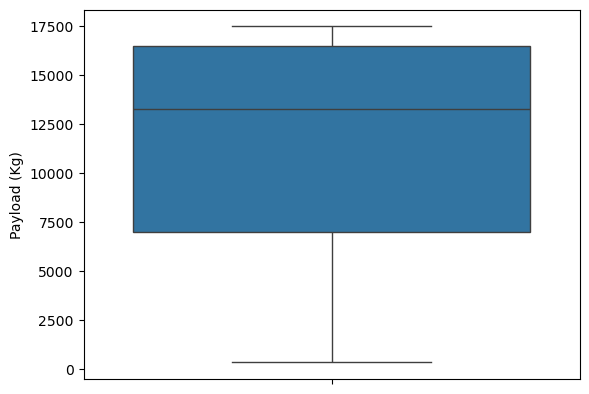

In [74]:
sns.boxplot(df_spacex, y='Payload (Kg)')

Text(0, 0.5, 'Number of Launches')

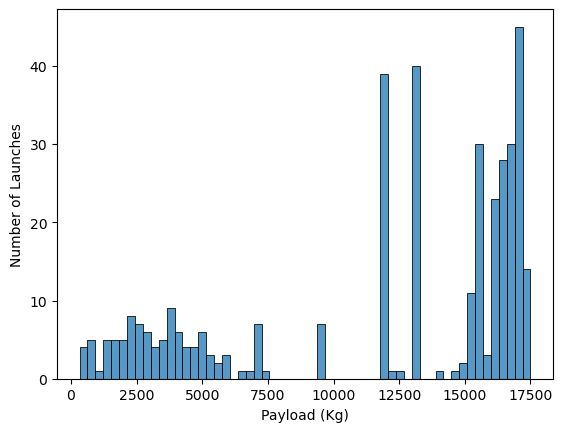

In [128]:
sns.histplot(df_spacex, x='Payload (Kg)', binwidth=300)
plt.ylabel('Number of Launches')

There are not outlier values, so we keep the feature as it is.

Let's do some visualizations to understand our data:

Text(0.5, 1.0, 'Payload Distribution')

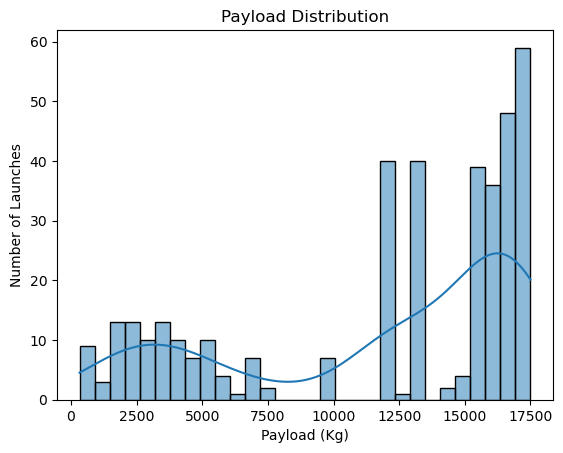

In [129]:
sns.histplot(df_spacex, x='Payload (Kg)', bins=30, kde=True)
plt.ylabel('Number of Launches')
plt.title('Payload Distribution')

Text(0.5, 1.0, 'Payload Mass vs Landing Success')

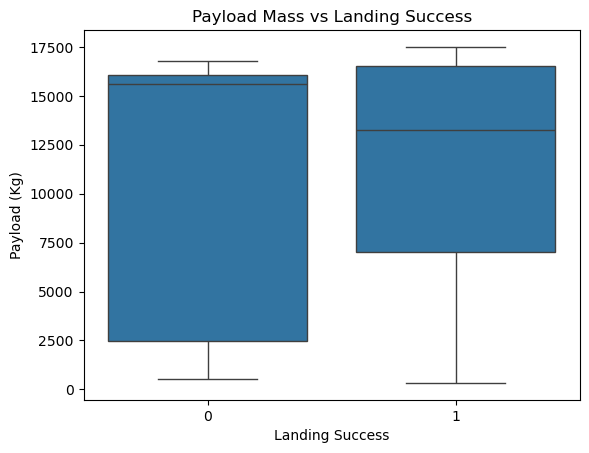

In [68]:
sns.boxplot(x='Landing Success', y='Payload (Kg)', data=df_spacex)
plt.title('Payload Mass vs Landing Success')

Text(0.5, 0, 'Payload Mass (Kg)')

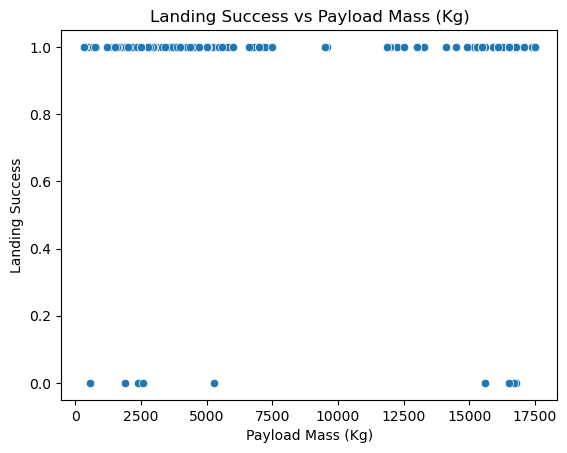

In [18]:
sns.scatterplot(x='Payload (Kg)', y='Landing Success', data=df_spacex)
plt.title('Landing Success vs Payload Mass (Kg)')
plt.xlabel('Payload Mass (Kg)')

Text(0.5, 1.0, 'Payload Mass per Orbit')

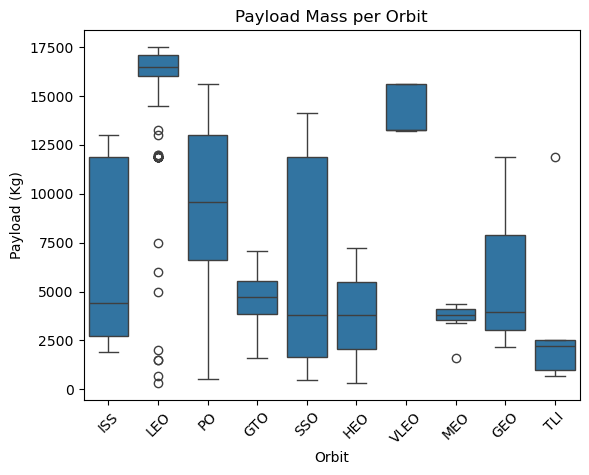

In [19]:
sns.boxplot(x='Orbit', y='Payload (Kg)', data=df_spacex)
plt.xticks(rotation=45)
plt.title('Payload Mass per Orbit')

From the above graphs we can extract some useful information:

a) At the first graph we see the distribution of the Payload Mass.
The majority of the boosters weighs more than 12,000 Kg.

b) At the second graph, we see that failure have more probabilities to happen in lighter payload masses.

c) At the third graph, we see that failures tend to occur at the extreme values of the Payload Mass,
either at very low or very high payloads.

d) At the fourth graph, we see that for some orbits have been used more tight weight ranges (either light or heavy),
while in others the weight range was wider.

Does Orbit relate with Success?

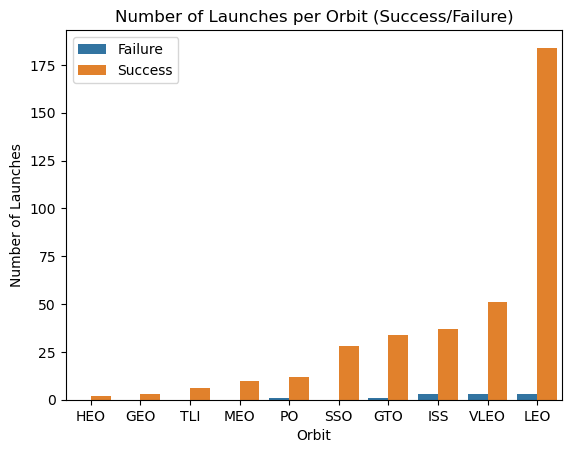

In [125]:
order = df_spacex['Orbit'].value_counts().sort_values().index
sns.countplot(df_spacex, x='Orbit', hue='Landing Success', order=order)
plt.ylabel('Number of Launches')
plt.title('Number of Launches per Orbit (Success/Failure)')
plt.legend(['Failure', 'Success'])

C:\Users\George\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


C:\Users\George\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


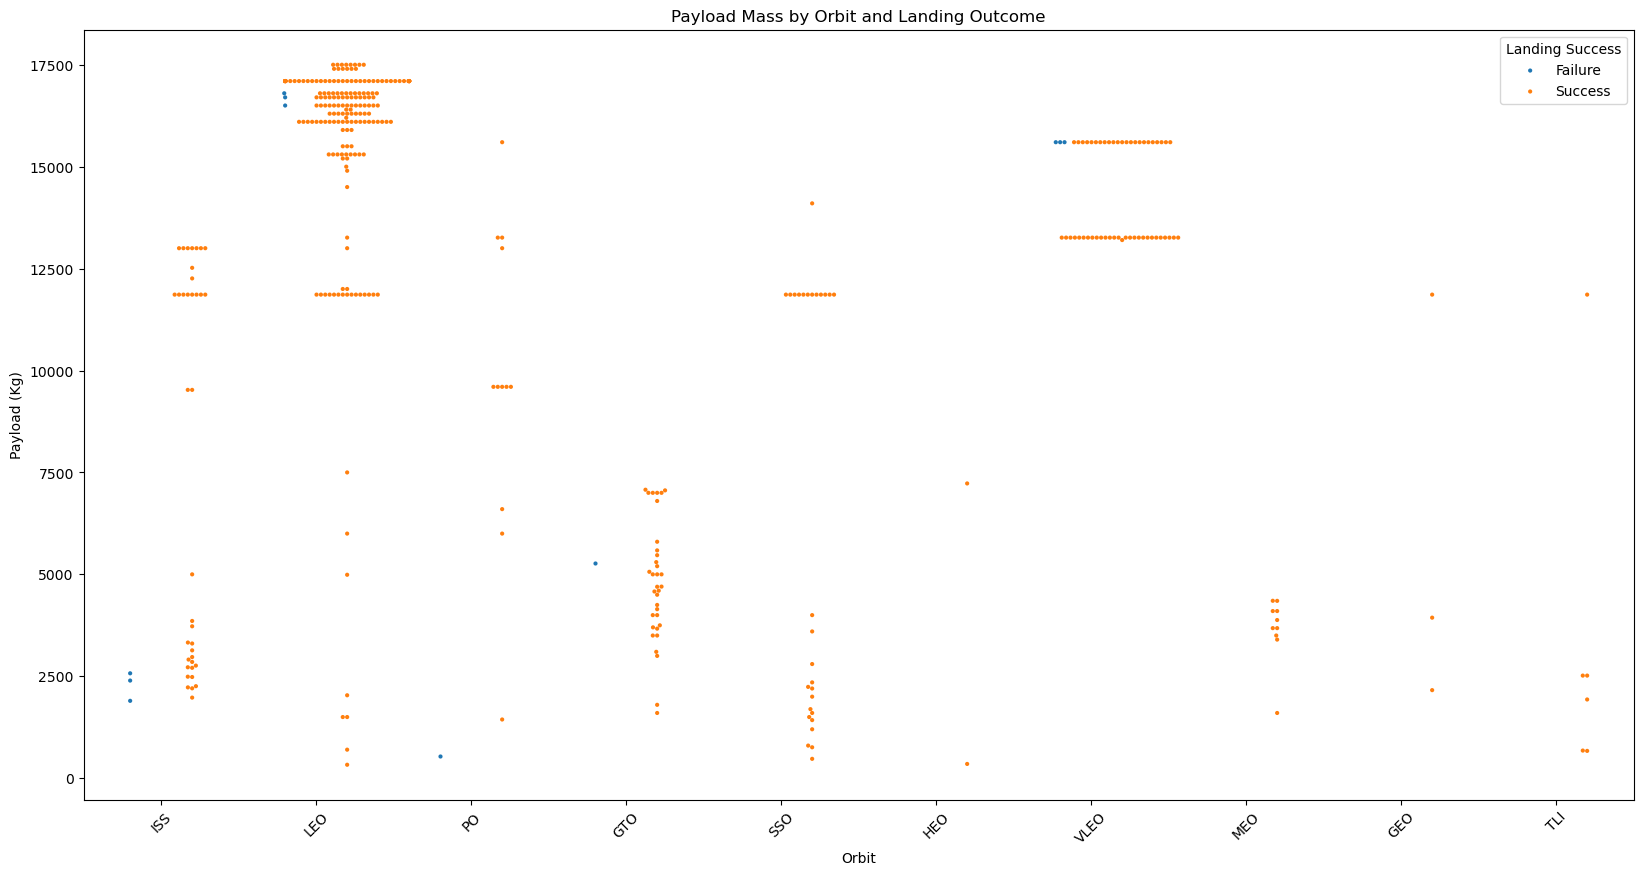

In [54]:
plt.figure(figsize=(20,10))
sns.swarmplot(
    data=df_spacex,
    x='Orbit',
    y='Payload (Kg)',
    hue='Landing Success',
    size=3,
    dodge=True
)

plt.title('Payload Mass by Orbit and Landing Outcome')
plt.xticks(rotation=45)
plt.legend(title='Landing Success', labels=['Failure', 'Success'])


As we expected, launches for orbits like LEO or VLEO carried heavier payloads, while orbits like GTO or MEO carried lighter payloads. 

In [10]:
orb_success = df_spacex.groupby('Orbit')['Landing Success'].mean().sort_values()
print('Success Rate per Orbit is: ')
print(orb_success)

Success Rate per Orbit is: 
Orbit
PO      0.923077
ISS     0.925000
VLEO    0.944444
GTO     0.971429
LEO     0.983957
GEO     1.000000
HEO     1.000000
MEO     1.000000
SSO     1.000000
TLI     1.000000
Name: Landing Success, dtype: float64


So we see that Orbit influences the outcome and this because for some orbits, SpaceX has to use more fuel (failed outcomes happen most likely when the booster is out of fuel) or some orbits are used for more difficult missions or different payloads.

Let's see if landpad is related with landing outcome:

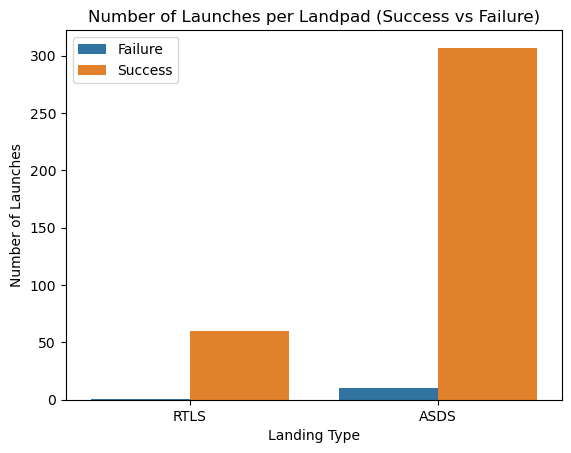

In [127]:
order = df_spacex['Landing Type'].value_counts().sort_values().index
sns.countplot(df_spacex, x='Landing Type', hue='Landing Success', order=order)
plt.xlabel('Landing Type')
plt.ylabel('Number of Launches')
plt.title('Number of Launches per Landpad (Success vs Failure)')
plt.legend(['Failure', 'Success'])
plt.show()

In [144]:
# Success Rate for each Land Type
success_rate = df_spacex.groupby('Landing Type')['Landing Success'].mean()
print(success_rate)

Landing Type
ASDS    0.968454
RTLS    0.983607
Name: Landing Success, dtype: float64


So we see that even if the ASDS is used more often, te RTLS has slightly better success rate.

Let's see if Launch Sites have any relationship with Landing Success:

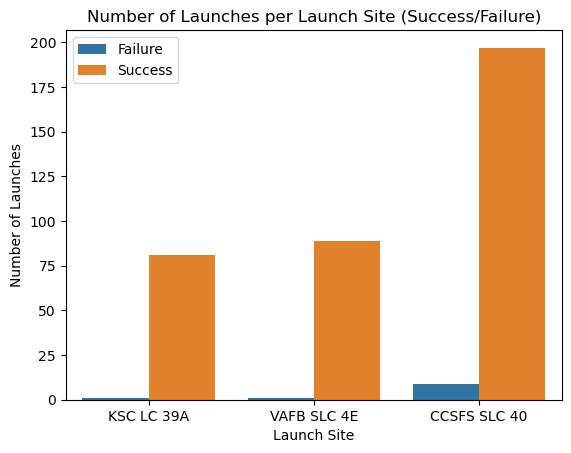

In [20]:
order = df_spacex['Launch Site'].value_counts().sort_values().index
plt.figure()
sns.countplot(df_spacex, x='Launch Site', hue='Landing Success', order=order)
plt.ylabel('Number of Launches')
plt.title('Number of Launches per Launch Site (Success/Failure)')
plt.legend(['Failure', 'Success'])

In [146]:
succ_rate = df_spacex.groupby('Launch Site')['Landing Success'].mean()
print(succ_rate)

Launch Site
CCSFS SLC 40    0.956311
KSC LC 39A      0.987805
VAFB SLC 4E     0.988889
Name: Landing Success, dtype: float64


So, as we see from the results, landing success seems to depend on the launch type. Even if CCSFS SLC 40 is the most used site, the other two have a better outcome

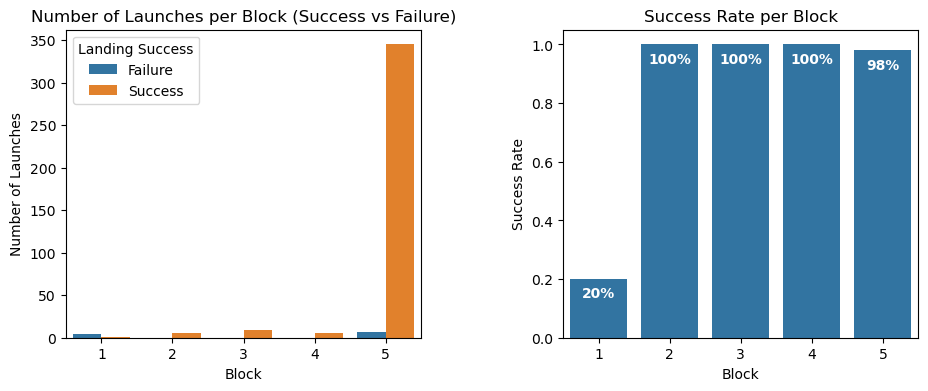

In [152]:
block_success= df_spacex.groupby('Block')['Landing Success'].mean()

fig, axes = plt.subplots(1, 2, figsize=(11,4))

# Left: Launches per Block plot
sns.countplot(df_spacex, x='Block',hue='Landing Success', ax=axes[0])
axes[0].set_ylabel('Number of Launches')
axes[0].set_title('Number of Launches per Block (Success vs Failure)')
axes[0].legend_.texts[0].set_text('Failure')
axes[0].legend_.texts[1].set_text('Success')

# Right: Success rate barplot
sns.barplot(block_success, ax=axes[1])
axes[1].set_title('Success Rate per Block')
axes[1].set_ylabel('Success Rate')
plt.subplots_adjust(wspace=0.4)

# Add percentage labels inside the bars (white text)
for i, val in enumerate(block_success.values):
    axes[1].text(i, val - 0.05, f"{val:.0%}", color='white', ha='center', va='center', fontweight='bold')

What about the relationship between Launch Sites and Landing Types:

<Axes: xlabel='Landing Type', ylabel='Launch Site'>

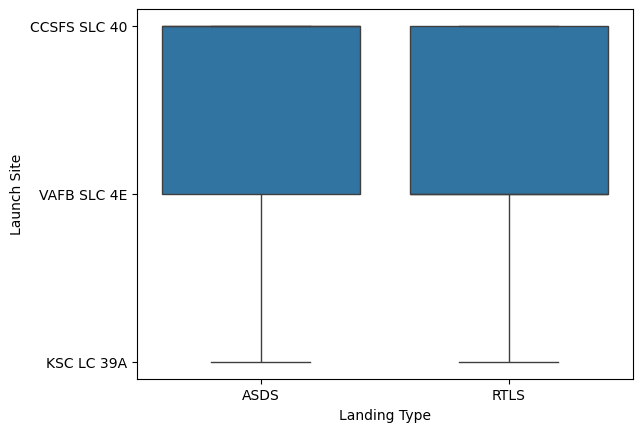

In [23]:
sns.boxplot(df_spacex, y='Launch Site', x='Landing Type')

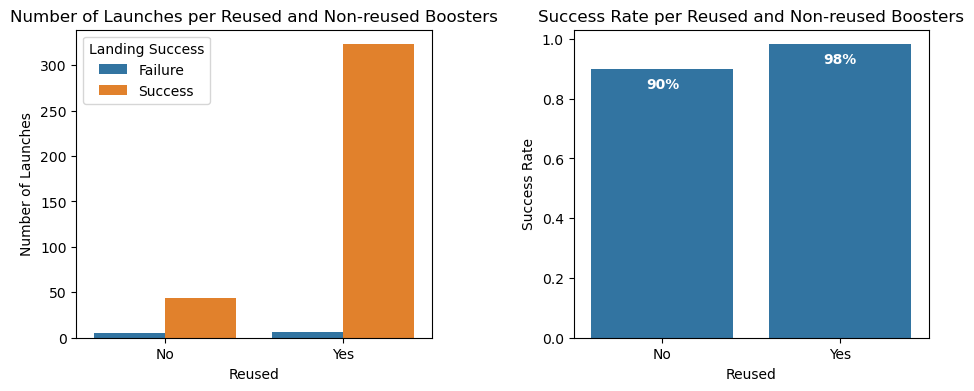

In [150]:
# Replace 0/1 with 'No'/'Yes'
yn = df_spacex
yn['Reused Label'] = df_spacex['Reused'].map({0: 'No', 1: 'Yes'})
reused_success = yn.groupby('Reused Label')['Landing Success'].mean()

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

# Left: Launch count plot
sns.countplot(data=yn, x='Reused Label', hue='Landing Success', ax=axes[0])
axes[0].set_ylabel('Number of Launches')
axes[0].set_xlabel('Reused')
axes[0].set_title('Number of Launches per Reused and Non-reused Boosters')
axes[0].legend_.texts[0].set_text('Failure')
axes[0].legend_.texts[1].set_text('Success')

# Right: Success rate barplot
sns.barplot(x=reused_success.index, y=reused_success.values, ax=axes[1])
axes[1].set_ylabel('Success Rate')
axes[1].set_xlabel('Reused')
axes[1].set_title('Success Rate per Reused and Non-reused Boosters')

# Add percentage labels inside the bars (white text)
for i, val in enumerate(reused_success.values):
    axes[1].text(i, val - 0.05, f"{val:.0%}", color='white', ha='center', va='center', fontweight='bold')

plt.subplots_adjust(wspace=0.4)
plt.show()

Maybe there is some relation between Launch Sites and Landing Types:

Text(0.5, 1.0, 'Landing Success Rate by Launch Site and Landing Type')

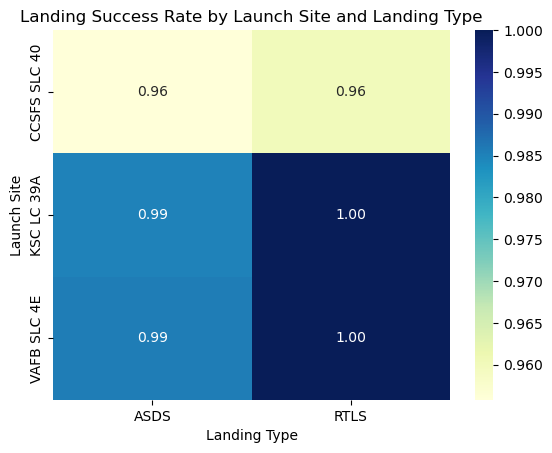

In [56]:
# Create Heatmap
pivot = df_spacex.pivot_table(
    values='Landing Success',
    index='Launch Site',
    columns='Landing Type',
    aggfunc='mean'
)

sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Landing Success Rate by Launch Site and Landing Type')


So, we see that launches from VAFB SLC 4E and KSC LC 39A, return to launch site (RTLS) with 100% success, while returns to the ocean pads (ASDS) and launches from CCSFS SLC 40 failed some times.

Finally, let's see the fluctuation of Success Rate per Year:

Text(0, 0.5, 'Success Rate')

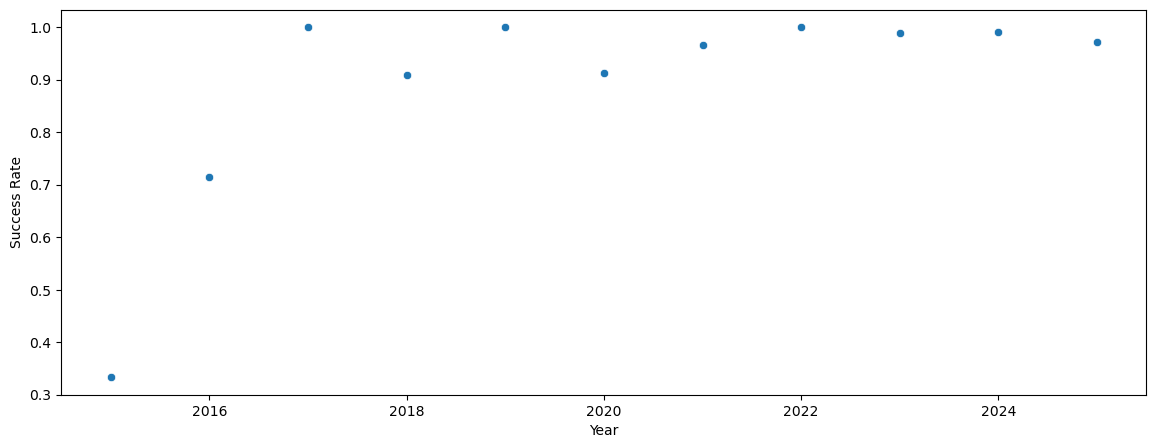

In [57]:
success_date = df_spacex[['Date', 'Landing Success']].copy()
success_date['Year'] = success_date['Date'].dt.year
success_date_rate = success_date.groupby('Year')['Landing Success'].mean()
success_df = pd.DataFrame(success_date_rate)

plt.figure(figsize=(14,5))
sns.scatterplot(success_df, x=success_df.index, y='Landing Success')
plt.ylabel('Success Rate')

After a sharp rise in 2017, successful landing rates plateau at over 90%, maintaining remarkable consistency.

In the next phase, we will use statistical modeling (logistic regression, decision trees, random forest) to evaluate whether the above correlations retain significance when controlling for multiple concurrent factors.

## Modeling

## Save/Load All

In [177]:
variables_dict = {
    'data': data,
    'data_dict': data_dict,
    'df': df,
    'df_spacex': df_spacex,
    'spacex_api_22': spacex_api_22,
    'spacex_wiki_23_25': spacex_wiki_23_25,
    'spacex22': spacex22,
    'spacex23_25': spacex23_25,
    't2023': t2023,
    't232425': t232425,
    'tables23_24_25': tables23_24_25,
}

joblib.dump(variables_dict, 'spacex_prj.joblib')

['spacex_prj.joblib']

In [1]:
# Required libraries
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

loaded_objects = joblib.load('spacex_prj.joblib')

data = loaded_objects['data']
data_dict = loaded_objects['data_dict']
df = loaded_objects['df']
df_spacex = loaded_objects['df_spacex']
spacex_api_22 = loaded_objects['spacex_api_22']
spacex_wiki_23_25 = loaded_objects['spacex_wiki_23_25']
spacex22 = loaded_objects['spacex22']
spacex23_25 = loaded_objects['spacex23_25']
t2023 = loaded_objects['t2023']
t232425 = loaded_objects['t232425']
tables23_24_25 = loaded_objects['tables23_24_25']